<a href="https://colab.research.google.com/github/wqiu96/MA574_Portfolio-Valuation-and-Risk-Management/blob/master/src/Markowitz2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import *
import os

In [2]:
!git clone https://github.com/wqiu96/MA574_Portfolio-Valuation-and-Risk-Management.git

Cloning into 'MA574_Portfolio-Valuation-and-Risk-Management'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 147 (delta 4), reused 0 (delta 0), pack-reused 127
Receiving objects: 100% (147/147), 1.86 MiB | 13.01 MiB/s, done.
Resolving deltas: 100% (33/33), done.


In [3]:
cd MA574_Portfolio-Valuation-and-Risk-Management/src/project3/

/content/MA574_Portfolio-Valuation-and-Risk-Management/src/project3


In [0]:
#Load data
os.chdir('/content/MA574_Portfolio-Valuation-and-Risk-Management/src/project3/')
file_chdir = os.getcwd()
filecsv_list = []
for root,dirs,files in os.walk(file_chdir):
  for file in files:
    if os.path.splitext(file)[1] == '.csv' and os.path.splitext(file)[0] != 'VXX':
      filecsv_list.append(file)
R = pd.DataFrame()
for csv in filecsv_list:
  data = pd.read_csv(csv)
  #calculate return
  R[csv.strip('.csv')] = np.array([((data['Adj Close'][j]/data['Adj Close'][j-1])-1) for j in range(1,len(data['Adj Close']))])
 

In [0]:
#Find the break points for every year
break_points = []
break_points.append(0)
break_points.append(data[data['Date'].isin(['2012-10-18'])].index[0])
break_points.append(data[data['Date'].isin(['2014-10-17'])].index[0])
break_points.append(data[data['Date'].isin(['2019-10-18'])].index[0])

In [6]:
break_points

[0, 757, 1258, 2517]

In [0]:
#Expected returns 
R_expect_1 = np.array(R[break_points[2]:break_points[3]].mean()).reshape(-1,1)
R_expect_2 = np.array(R[break_points[1]:break_points[3]].mean()).reshape(-1,1)
R_expect_3 = np.array(R[break_points[0]:break_points[3]].mean()).reshape(-1,1)

In [0]:
R_cov =  np.array(R[break_points[2]:break_points[3]].cov())
R_expect = R_expect_1
one = np.ones((len(R_expect),1))
A = np.dot(np.dot(one.reshape(1,-1),inv(R_cov)),R_expect)
B = np.dot(np.dot(R_expect.reshape(1,-1),inv(R_cov)),R_expect)
C = np.dot(np.dot(one.reshape(1,-1),inv(R_cov)),one)
D = B*C - A**2
g = (B * np.dot(inv(R_cov), one) - A* np.dot(inv(R_cov), R_expect))/D
h = (C * np.dot(inv(R_cov), R_expect) - A* np.dot(inv(R_cov), one))/D
min_sigma = np.dot(np.dot(g.reshape(1,-1),R_cov),g) - (np.dot(np.dot(h.reshape(1,-1),R_cov),g)**2)/np.dot(np.dot(h.reshape(1,-1),R_cov),h)

In [12]:
min_sigma

array([[4.40130489e-05]])

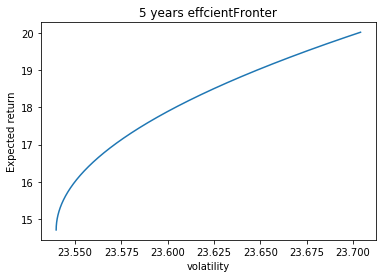

In [134]:
#5 years effcientFronter
sigma = []
mu = []
weight = []
before_ = np.inf
for i in range(30000,50000):
    w = g + h*0.00000001*i
    sigma_ = np.sqrt(np.dot(np.dot(w.reshape(1,-1),R_cov),w)[0][0])*np.sqrt(break_points[3]-break_points[2])*100
    if sigma_ > before_:
      sigma.append(sigma_)
      weight.append(w)
      mu.append(((1+0.00000001*i)**365 - 1)*100)
    before_ = sigma_
plt.plot(sigma,mu)
plt.ylabel("Expected return")
plt.xlabel("volatility")
plt.title("5 years effcientFronter")
plt.show()

In [14]:
weight[0] # weight for minimum variance(5 years)

array([[-0.00323648],
       [-0.06046523],
       [ 0.0028622 ],
       [ 0.08194963],
       [ 0.64421737],
       [-0.02723252],
       [ 0.17031783],
       [ 0.00535578],
       [ 0.19397081],
       [-0.05416766],
       [-0.01334993],
       [ 0.00292669],
       [ 0.00206613],
       [-0.12853912],
       [-0.02049677],
       [-0.01607688],
       [ 0.13499139],
       [ 0.02087011],
       [ 0.07160568],
       [-0.00756903]])

In [0]:
R_cov2 =  np.array(R[break_points[1]:break_points[3]].cov())
R_expect2 = R_expect_2
one = np.ones((len(R_expect2),1))
A2 = np.dot(np.dot(one.reshape(1,-1),inv(R_cov2)),R_expect2)
B2 = np.dot(np.dot(R_expect2.reshape(1,-1),inv(R_cov2)),R_expect2)
C2 = np.dot(np.dot(one.reshape(1,-1),inv(R_cov2)),one)
D2= B2*C2 - A2**2
g2 = (B2 * np.dot(inv(R_cov2), one) - A2* np.dot(inv(R_cov2), R_expect2))/D2
h2 = (C2 * np.dot(inv(R_cov2), R_expect2) - A2* np.dot(inv(R_cov2), one))/D2
min_sigma2 = np.dot(np.dot(g2.reshape(1,-1),R_cov2),g2) - (np.dot(np.dot(h2.reshape(1,-1),R_cov2),g2)**2)/np.dot(np.dot(h2.reshape(1,-1),R_cov2),h2)

In [16]:
min_sigma2

array([[4.30725326e-05]])

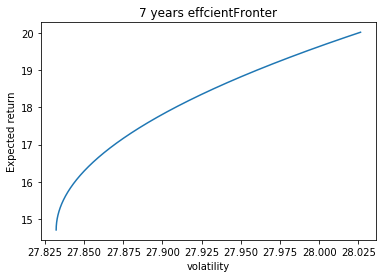

In [17]:
#7 years effcientFronter
sigma2 = []
mu2 = []
weight2 = []
before_2 = np.inf
for i in range(30000,50000):
    w = g + h*0.00000001*i
    sigma_ = np.sqrt(np.dot(np.dot(w.reshape(1,-1),R_cov),w)[0][0])*np.sqrt(break_points[3]-break_points[1])*100
    if sigma_ > before_2:
      sigma2.append(sigma_)
      weight2.append(w)
      mu2.append(((1+0.00000001*i)**365 - 1)*100)
    before_2 = sigma_
plt.plot(sigma2,mu2)
plt.ylabel("Expected return")
plt.xlabel("volatility")
plt.title("7 years effcientFronter")
plt.show()

In [18]:
weight2[0] # weight for minimum variance(7 years)

array([[-0.00323648],
       [-0.06046523],
       [ 0.0028622 ],
       [ 0.08194963],
       [ 0.64421737],
       [-0.02723252],
       [ 0.17031783],
       [ 0.00535578],
       [ 0.19397081],
       [-0.05416766],
       [-0.01334993],
       [ 0.00292669],
       [ 0.00206613],
       [-0.12853912],
       [-0.02049677],
       [-0.01607688],
       [ 0.13499139],
       [ 0.02087011],
       [ 0.07160568],
       [-0.00756903]])

In [0]:
R_cov3 =  np.array(R[break_points[0]:break_points[3]].cov())
R_expect3 = R_expect_3
one = np.ones((len(R_expect3),1))
A3 = np.dot(np.dot(one.reshape(1,-1),inv(R_cov3)),R_expect3)
B3 = np.dot(np.dot(R_expect3.reshape(1,-1),inv(R_cov3)),R_expect3)
C3 = np.dot(np.dot(one.reshape(1,-1),inv(R_cov3)),one)
D3= B3*C3 - A3**2
g3 = (B3 * np.dot(inv(R_cov3), one) - A3* np.dot(inv(R_cov3), R_expect3))/D3
h3 = (C3 * np.dot(inv(R_cov3), R_expect3) - A3* np.dot(inv(R_cov3), one))/D3
min_sigma3 = np.dot(np.dot(g3.reshape(1,-1),R_cov3),g3) - (np.dot(np.dot(h3.reshape(1,-1),R_cov3),g3)**2)/np.dot(np.dot(h3.reshape(1,-1),R_cov3),h3)

In [20]:
min_sigma3

array([[4.80620184e-05]])

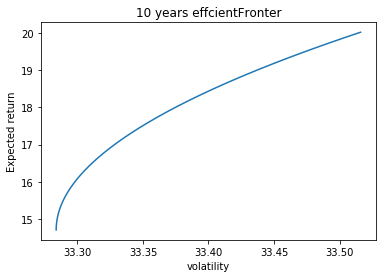

In [21]:
#10 years effcientFronter
sigma3 = []
mu3 = []
weight3 = []
before_3 = np.inf
for i in range(30000,50000):
    w = g + h*0.00000001*i
    sigma_ = np.sqrt(np.dot(np.dot(w.reshape(1,-1),R_cov),w)[0][0])*np.sqrt(break_points[3]-break_points[0])*100
    if sigma_ > before_3:
      sigma3.append(sigma_)
      weight3.append(w)
      mu3.append(((1+0.00000001*i)**365 - 1)*100)
    before_3 = sigma_
plt.plot(sigma3,mu3)
plt.ylabel("Expected return")
plt.xlabel("volatility")
plt.title("10 years effcientFronter")
plt.show()

In [22]:
weight[0] # weight for minimum variance(10 years)

array([[-0.00323648],
       [-0.06046523],
       [ 0.0028622 ],
       [ 0.08194963],
       [ 0.64421737],
       [-0.02723252],
       [ 0.17031783],
       [ 0.00535578],
       [ 0.19397081],
       [-0.05416766],
       [-0.01334993],
       [ 0.00292669],
       [ 0.00206613],
       [-0.12853912],
       [-0.02049677],
       [-0.01607688],
       [ 0.13499139],
       [ 0.02087011],
       [ 0.07160568],
       [-0.00756903]])

In [0]:
R_copy = R.copy()
vxx = pd.read_csv('VXX.csv')
R_copy['VXX'] = np.array([((vxx['Adj Close'][j]/vxx['Adj Close'][j-1])-1) for j in range(1,len(vxx['Adj Close']))])

In [0]:
R_cov4 =  np.array(R_copy[break_points[2]:break_points[3]].cov())
R_expect4 = np.array(R_copy[break_points[2]:break_points[3]].mean()).reshape(-1,1)
one = np.ones((len(R_expect4),1))
A4 = np.dot(np.dot(one.reshape(1,-1),inv(R_cov4)),R_expect4)
B4 = np.dot(np.dot(R_expect4.reshape(1,-1),inv(R_cov4)),R_expect4)
C4 = np.dot(np.dot(one.reshape(1,-1),inv(R_cov4)),one)
D4= B4*C4 - A4**2
g4 = (B4 * np.dot(inv(R_cov4), one) - A4* np.dot(inv(R_cov4), R_expect4))/D4
h4 = (C4 * np.dot(inv(R_cov4), R_expect4) - A4* np.dot(inv(R_cov4), one))/D4
min_sigma4 = np.dot(np.dot(g4.reshape(1,-1),R_cov4),g4) - (np.dot(np.dot(h4.reshape(1,-1),R_cov4),g4)**2)/np.dot(np.dot(h4.reshape(1,-1),R_cov4),h4)

In [280]:
min_sigma4

array([[1.3633812e-05]])

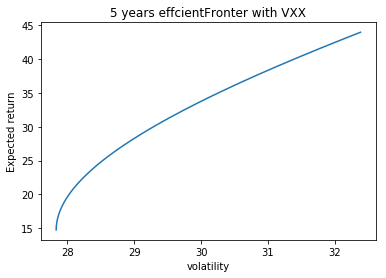

In [281]:
#5 years effcientFronter with VXX
sigma_v = []
mu_v = []
weight_v = []
before_v = np.inf
for i in range(300,1000):
    w = g + h*0.000001*i
    sigma_ = np.sqrt(np.dot(np.dot(w.reshape(1,-1),R_cov),w)[0][0])*np.sqrt(break_points[3]-break_points[1])*100
    if sigma_ > before_v:
      sigma_v.append(sigma_)
      weight_v.append(w)
      mu_v.append(((1+0.000001*i)**365 - 1)*100)
    before_v = sigma_
plt.plot(sigma_v,mu_v)
plt.ylabel("Expected return")
plt.xlabel("volatility")
plt.title("5 years effcientFronter with VXX")
plt.show()

In [0]:
rf = 0.0156 # Choose 5 year US treasury rate as risk free rate
def findTangent(sigma, mu, rf):
  max_ = 0
  index_ = 0
  for i in range(0,len(mu)):
      k = (mu[i] - rf*100)/sigma[i]
      if k > max_:
        max_ = k
        index_ = i
  return max_,index_
k,m = findTangent(sigma_v, mu_v, rf)

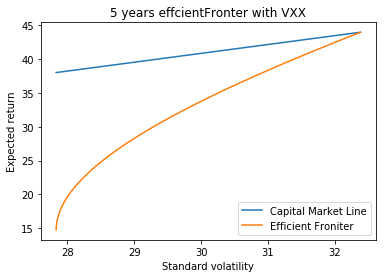

In [285]:
targent_v = [rf*100 + k * sigma_v[i] for i in range(len(sigma_v))]
plt.plot(sigma_v,targent_v,label = "Capital Market Line")
plt.plot(sigma_v,mu_v,label = "Efficient Froniter")
plt.ylabel("Expected return")
plt.xlabel("Standard volatility")
plt.title("5 years effcientFronter with VXX")
plt.legend()
plt.show()


In [286]:
weight_ = weight[m]
weight_

array([[-0.00274874],
       [-0.05759728],
       [ 0.00214765],
       [ 0.08241112],
       [ 0.63764538],
       [-0.02749875],
       [ 0.16994418],
       [ 0.00502653],
       [ 0.19536519],
       [-0.05428104],
       [-0.0127361 ],
       [ 0.00298535],
       [ 0.00116501],
       [-0.12731192],
       [-0.02003071],
       [-0.01598912],
       [ 0.13611645],
       [ 0.0207114 ],
       [ 0.07123929],
       [-0.0065639 ]])